In [1]:
#Basic Libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
from scipy.stats import rankdata, norm
from scipy import stats


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("OnlineNewsPopularity.csv")
df = pd.DataFrame(dataset)

In [4]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
df.tail()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,...,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [7]:
df.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [8]:
# Find and display all duplicated rows in the Dry Bean Dataset
duplicated_rows = df[df.duplicated(keep=False)]
print("Duplicated rows online news popularity Dataset:")
print(duplicated_rows)

Duplicated rows online news popularity Dataset:
Empty DataFrame
Columns: [url,  timedelta,  n_tokens_title,  n_tokens_content,  n_unique_tokens,  n_non_stop_words,  n_non_stop_unique_tokens,  num_hrefs,  num_self_hrefs,  num_imgs,  num_videos,  average_token_length,  num_keywords,  data_channel_is_lifestyle,  data_channel_is_entertainment,  data_channel_is_bus,  data_channel_is_socmed,  data_channel_is_tech,  data_channel_is_world,  kw_min_min,  kw_max_min,  kw_avg_min,  kw_min_max,  kw_max_max,  kw_avg_max,  kw_min_avg,  kw_max_avg,  kw_avg_avg,  self_reference_min_shares,  self_reference_max_shares,  self_reference_avg_sharess,  weekday_is_monday,  weekday_is_tuesday,  weekday_is_wednesday,  weekday_is_thursday,  weekday_is_friday,  weekday_is_saturday,  weekday_is_sunday,  is_weekend,  LDA_00,  LDA_01,  LDA_02,  LDA_03,  LDA_04,  global_subjectivity,  global_sentiment_polarity,  global_rate_positive_words,  global_rate_negative_words,  rate_positive_words,  rate_negative_words,  avg

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [10]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Since weekday indicators and data channel columns are binary (1/0), identify them as categorical
# Example: Assume weekday columns start with 'weekday_' and data channels with 'data_channel_'
categorical_cols = [col for col in df.columns if col.startswith(' weekday_') or col.startswith(' data_channel_')]
categorical_cols.append(' is_weekend')

# Remove the binary columns from the numerical columns list
numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

print("\nNumerical columns:", numerical_cols)
print("\nCategorical (binary) columns:", categorical_cols)


Numerical columns: [' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', ' rate_negative_words', ' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity', ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity', ' abs_title_sentiment_polarity', ' shares']

Categorical (binary) column

/var/folders/mm/_1tx3g0x1fxfsx7bt24kcyv80000gp/T/ipykernel_2710/1443539824.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_shares_df, x='Channel', y='Total Shares', palette="viridis")


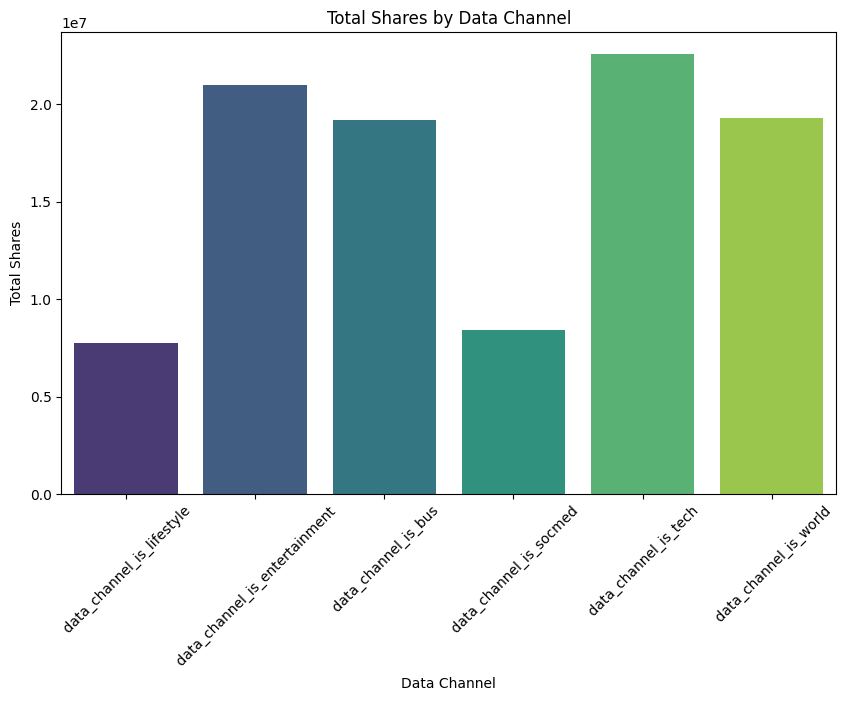

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of data channel columns
channel_columns = [
    ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', 
    ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world'
]

# Calculate the total shares for each channel by summing 'shares' where each channel is active (1)
channel_shares = {channel: df[df[channel] == 1][' shares'].sum() for channel in channel_columns}

# Convert the dictionary to a DataFrame for easier plotting
channel_shares_df = pd.DataFrame(list(channel_shares.items()), columns=['Channel', 'Total Shares'])

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_shares_df, x='Channel', y='Total Shares', palette="viridis")
plt.title("Total Shares by Data Channel")
plt.xlabel("Data Channel")
plt.ylabel("Total Shares")
plt.xticks(rotation=45)
plt.show()


/var/folders/mm/_1tx3g0x1fxfsx7bt24kcyv80000gp/T/ipykernel_2710/185216643.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_shares_df, x='Day', y='Total Shares', palette="viridis")


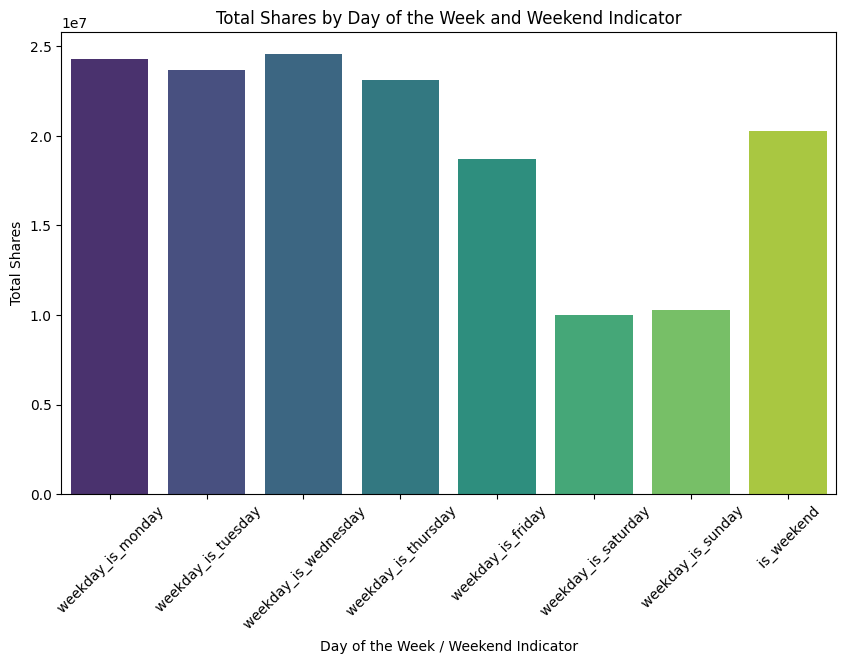

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of weekday columns and weekend indicator
weekday_columns = [
    ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
    ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend'
]

# Calculate the total shares for each weekday and weekend by summing 'shares' where each column is active (1)
weekday_shares = {day: df[df[day] == 1][' shares'].sum() for day in weekday_columns}

# Convert the dictionary to a DataFrame for easier plotting
weekday_shares_df = pd.DataFrame(list(weekday_shares.items()), columns=['Day', 'Total Shares'])

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_shares_df, x='Day', y='Total Shares', palette="viridis")
plt.title("Total Shares by Day of the Week and Weekend Indicator")
plt.xlabel("Day of the Week / Weekend Indicator")
plt.ylabel("Total Shares")
plt.xticks(rotation=45)
plt.show()

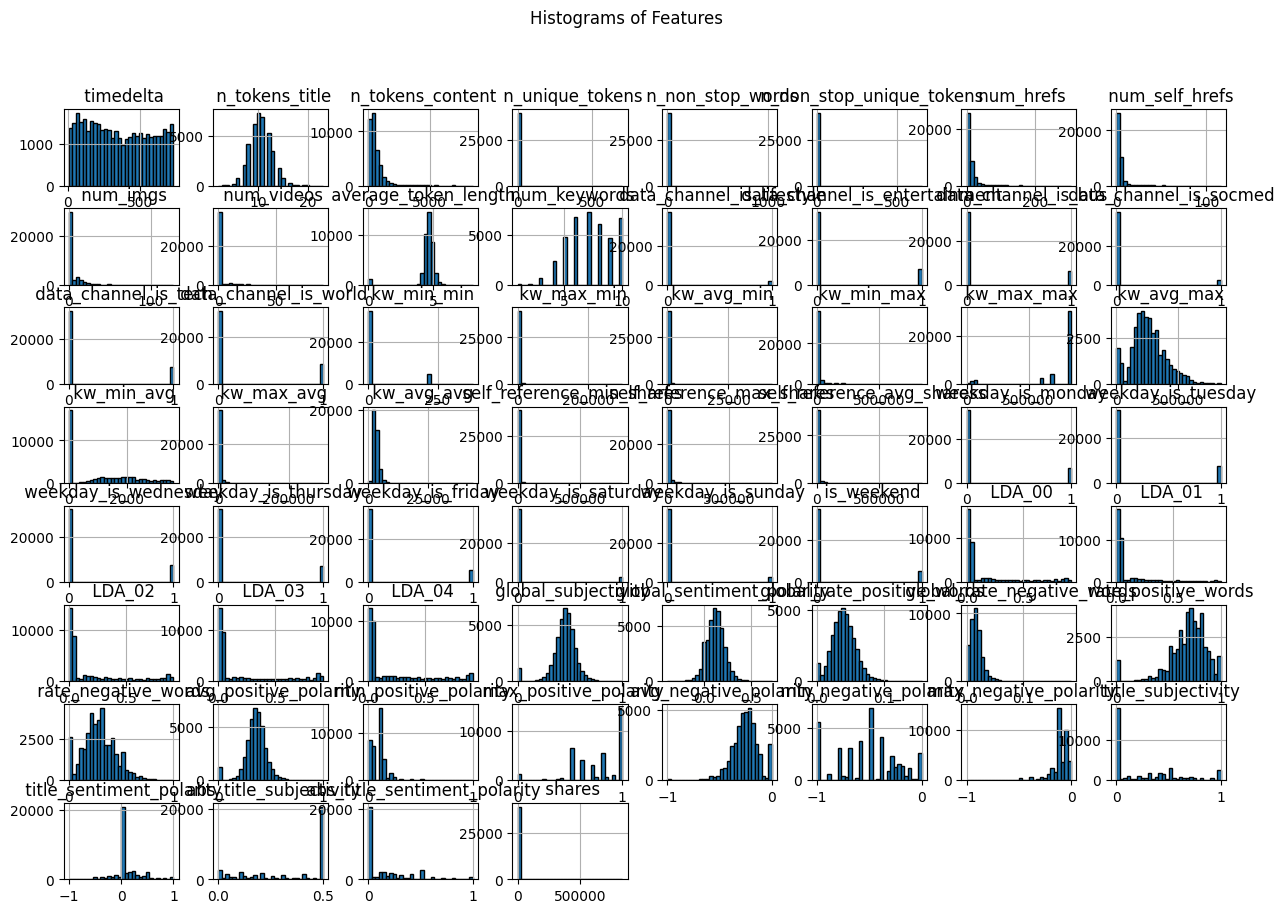

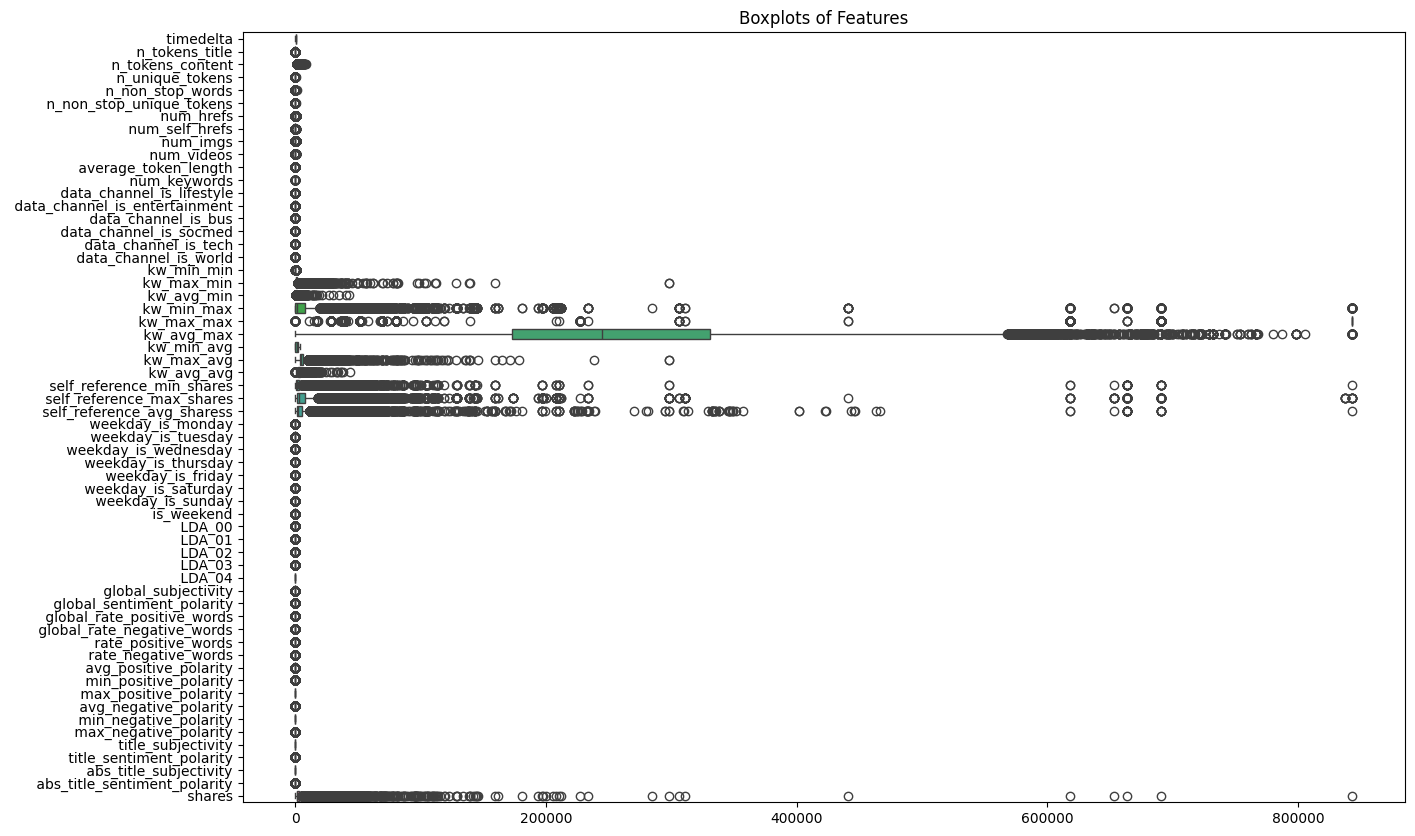

In [13]:
# Histograms
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

# Box plots for each feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')
plt.title('Boxplots of Features')
plt.show()


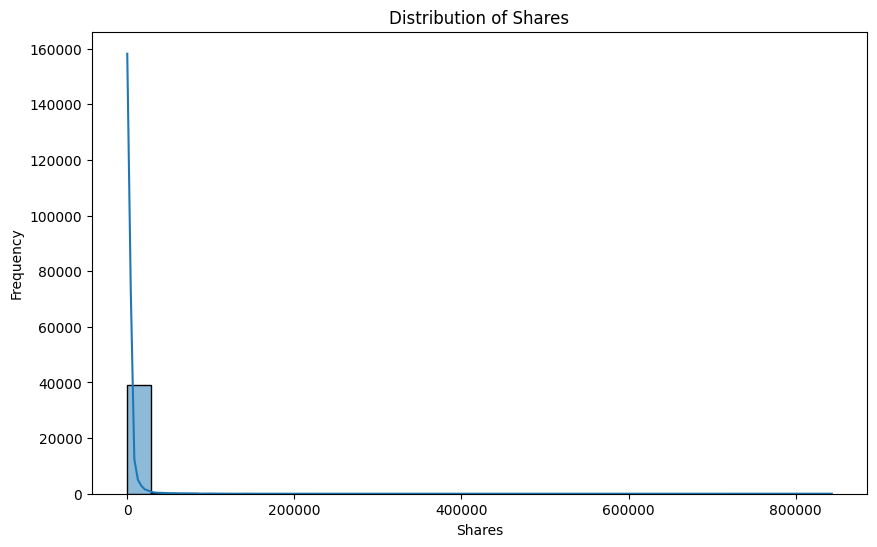

In [14]:
# Visualize data using plots
plt.figure(figsize=(10, 6))
sns.histplot(df[' shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

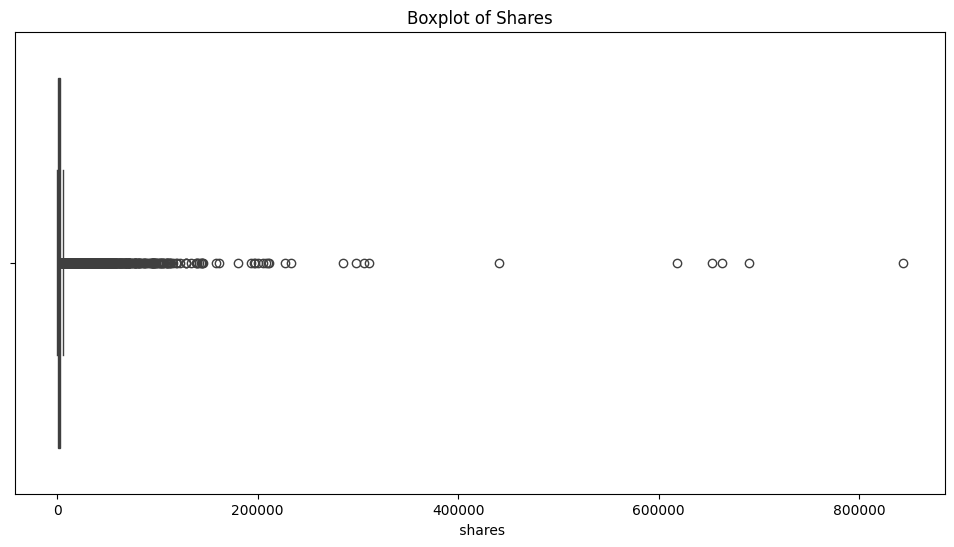

In [15]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=' shares', data=df)
plt.title('Boxplot of Shares')
plt.show()

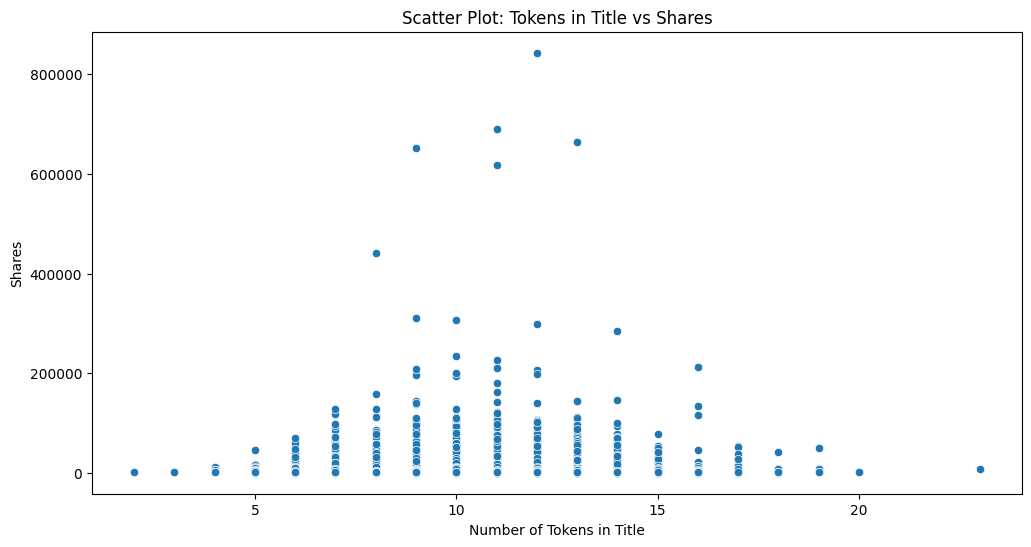

In [16]:
# Scatter plot (assuming we have a numerical column to compare)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=' n_tokens_title', y=' shares', data=df)
plt.title('Scatter Plot: Tokens in Title vs Shares')
plt.xlabel('Number of Tokens in Title')
plt.ylabel('Shares')
plt.show()

In [17]:
# checks for the skewness and kurtosis
!pip install scipy
from scipy.stats import skew, kurtosis

skewness = skew(df[' shares'])
kurt = kurtosis(df[' shares'])

print(f"Skewness of Shares: {skewness}")
print(f"Kurtosis of Shares: {kurt}")


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Skewness of Shares: 33.9625997792866
Kurtosis of Shares: 1832.4413727401281


## Data Preprocessing - Data Cleaning:

In [18]:
df.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

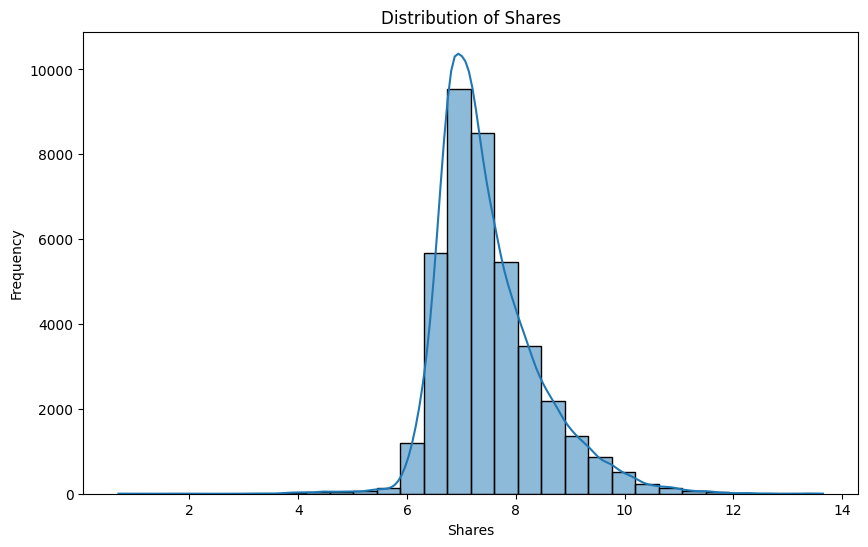

In [19]:
import numpy as np

# Log transform the target variable (if right-skewed)
df[' shares'] = np.log1p(df[' shares'])

# Visualize data using plots
plt.figure(figsize=(10, 6))
sns.histplot(df[' shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

## outlier treetment

In [20]:
import numpy as np

def count_outliers_iqr(df):
    outlier_count = 0  # Initialize counter for total outliers
    column_outlier_counts = {}  # Dictionary to store outlier counts per column

    for col in df.columns:
        if df[col].dtype != 'object':  # Only check numeric columns
            Q1 = np.percentile(df[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers for this column
            num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
            outlier_count += num_outliers
            column_outlier_counts[col] = num_outliers
            
            print(f"Feature: {col} | Outliers: {num_outliers}")
    
    print("\nTotal number of outliers across all columns:", outlier_count)
    return column_outlier_counts, outlier_count

# Usage
column_outlier_counts, total_outliers = count_outliers_iqr(df)

print("\nTotal number of outliers in the dataset:", total_outliers)

Feature:  timedelta | Outliers: 0
Feature:  n_tokens_title | Outliers: 156
Feature:  n_tokens_content | Outliers: 1933
Feature:  n_unique_tokens | Outliers: 1604
Feature:  n_non_stop_words | Outliers: 2827
Feature:  n_non_stop_unique_tokens | Outliers: 1733
Feature:  num_hrefs | Outliers: 2169
Feature:  num_self_hrefs | Outliers: 2090
Feature:  num_imgs | Outliers: 7703
Feature:  num_videos | Outliers: 2946
Feature:  average_token_length | Outliers: 1681
Feature:  num_keywords | Outliers: 51
Feature:  data_channel_is_lifestyle | Outliers: 2099
Feature:  data_channel_is_entertainment | Outliers: 7057
Feature:  data_channel_is_bus | Outliers: 6258
Feature:  data_channel_is_socmed | Outliers: 2323
Feature:  data_channel_is_tech | Outliers: 7346
Feature:  data_channel_is_world | Outliers: 8427
Feature:  kw_min_min | Outliers: 4677
Feature:  kw_max_min | Outliers: 3661
Feature:  kw_avg_min | Outliers: 2081
Feature:  kw_min_max | Outliers: 5063
Feature:  kw_max_max | Outliers: 9440
Feature: 

In [21]:

# Function to detect and cap outliers using the IQR method
def cap_outliers_iqr(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Example usage
# Assuming df1 is your DataFrame and numerical_columns contains your numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Apply capping to outliers after imputing them with the median
df_capped = cap_outliers_iqr(df, numerical_columns)

# View the data after capping outliers
print("Data after capping outliers:\n", df_capped.head())

Data after capping outliers:
                                                  url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0              

<function matplotlib.pyplot.show(close=None, block=None)>

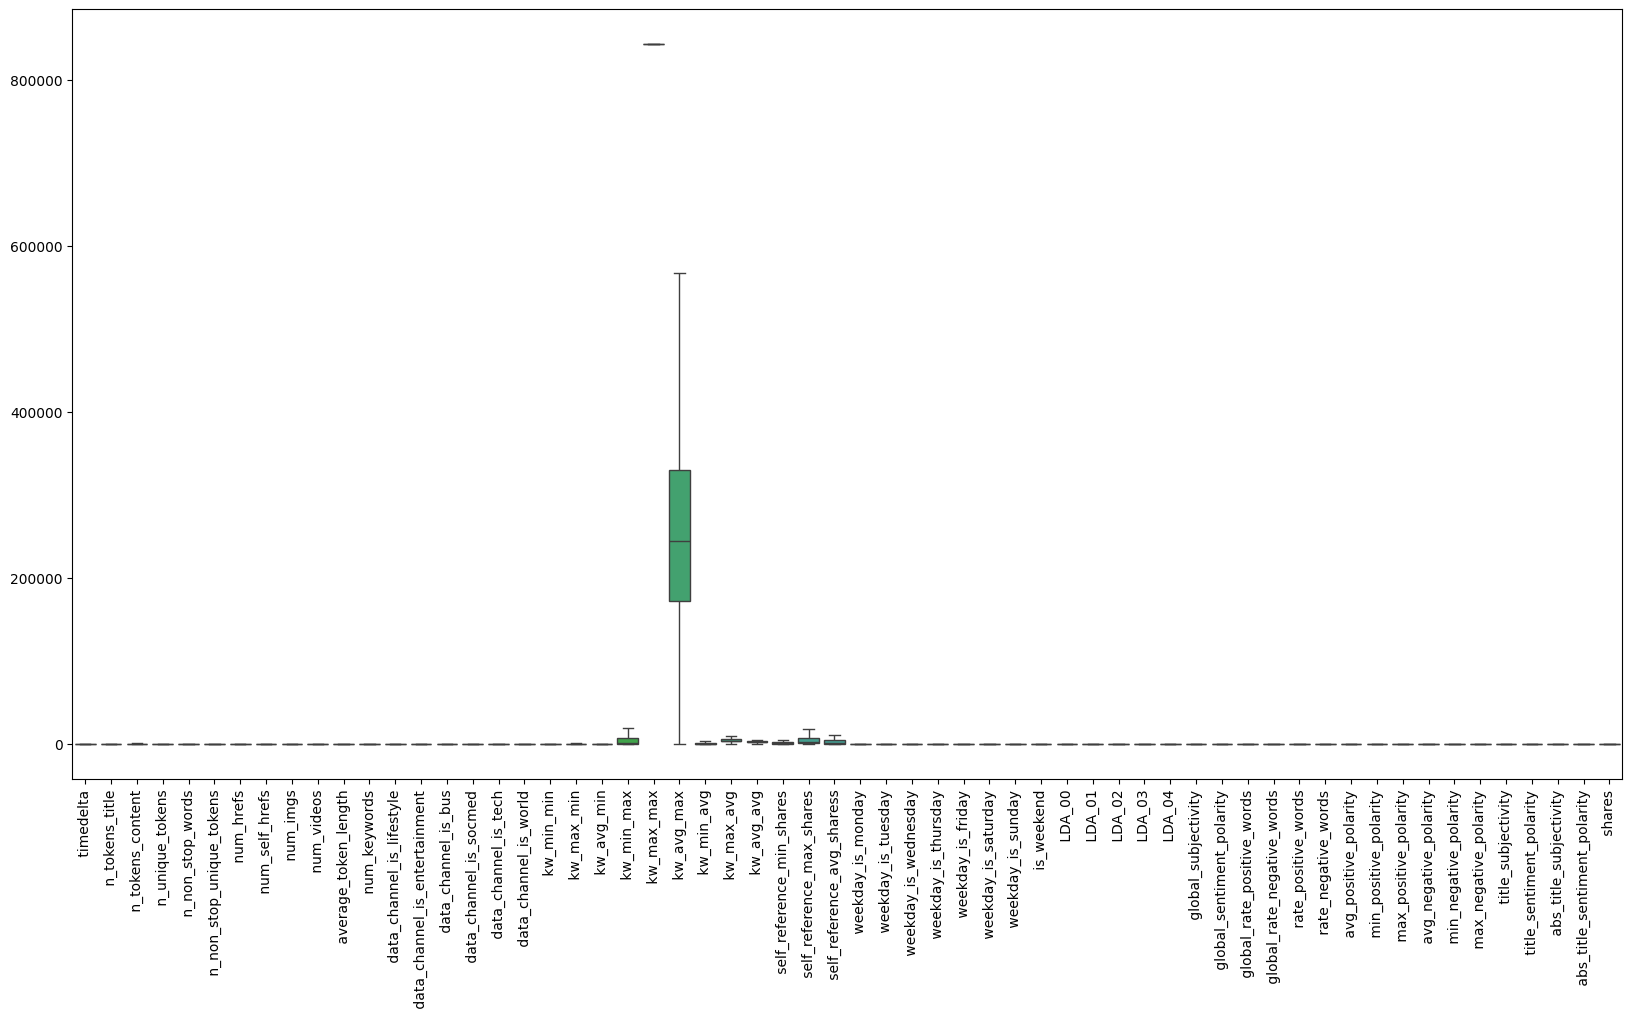

In [22]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (20,10))
sns.boxplot(data = df_capped.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show

## Bivariate Analysis

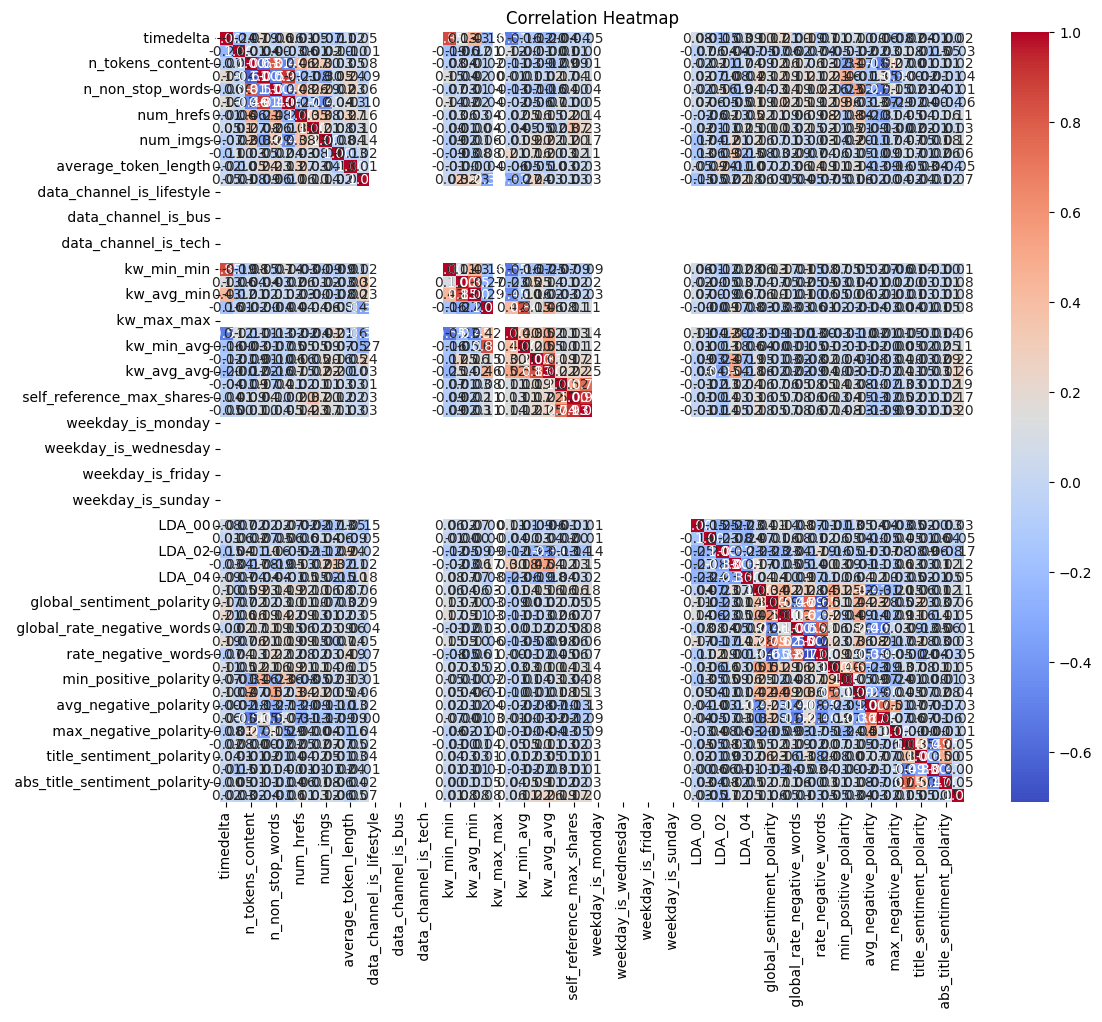

In [23]:
# Exclude non-numeric columns, such as 'Class'
numeric_data = df_capped.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd

# Calculate the correlation matrix
numeric_data = df_capped.select_dtypes(include = ['int64','float64'])
correlation_matrix = numeric_data.corr().abs()
correlation_matrix

#plt.figure(figsize = (12,10))
# sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm' , square = True , linewidth = .5)
#plt.show()

# Set the thresholds for high correlation
lower_threshold_positive = 0.97
upper_threshold_positive = 1.0
lower_threshold_negative = -1.0
upper_threshold_negative = -0.97

# Find pairs of features with correlation between 0.97 and 1, or -1 and -0.97
high_correlation = correlation_matrix[
    ((correlation_matrix >= lower_threshold_positive) & (correlation_matrix < upper_threshold_positive)) |
    ((correlation_matrix <= upper_threshold_negative) & (correlation_matrix > lower_threshold_negative))
]

# Print the feature names and their correlations in a descriptive format
for feature_1, feature_2, correlation in high_correlation.stack().reset_index().values:
    print(f"The correlation between {feature_1} and {feature_2} is {correlation:.2f}.")

In [28]:
skewness = df_capped.select_dtypes(include=['float64','int64']).skew()
print(skewness)

timedelta                        0.120504
n_tokens_title                   0.136293
n_tokens_content                 0.983430
n_unique_tokens                 -0.151793
n_non_stop_words                 0.000000
n_non_stop_unique_tokens        -0.284937
num_hrefs                        1.095150
num_self_hrefs                   0.817203
num_imgs                         1.089328
num_videos                       1.303549
average_token_length            -0.125864
num_keywords                    -0.138796
data_channel_is_lifestyle        0.000000
data_channel_is_entertainment    0.000000
data_channel_is_bus              0.000000
data_channel_is_socmed           0.000000
data_channel_is_tech             0.000000
data_channel_is_world            0.000000
kw_min_min                       1.261410
kw_max_min                       0.783821
kw_avg_min                       0.801512
kw_min_max                       1.197249
kw_max_max                       0.000000
kw_avg_max                       0

In [31]:
df1 = df_capped
df1 = df1.drop(columns=['url'])

In [32]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox



def handle_skewness(df1, threshold=0.5):
    numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns
    for column in numerical_cols:  # Iterate over numerical columns
        skewness = df1[column].skew() # Calculate skewness for individual column

        if skewness > threshold:
            # Positively skewed: apply log or sqrt
            if (df1[column] > 0).all():  # Ensure there are no zero or negative values
                df1[column] = np.log1p(df1[column])  # log(1 + value)
            else:
                df1[column] = np.sqrt(df1[column])  # Square root transformation

        elif skewness < -threshold:
            # Negatively skewed: apply square or Box-Cox
            if (df1[column] >= 0).all():  # Ensure non-negative values for Box-Cox
                df1[column], _ = boxcox(df1[column] + 1)  # Add 1 to avoid zero values
            else:
                df1[column] = df1[column] ** 2  # Square the values

        # No action for moderately skewed data (-0.5 < skewness < 0.5)

    return df1

# Apply to your dataset
data_transformed = handle_skewness(df1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
df2= data_transformed

In [42]:
df2.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

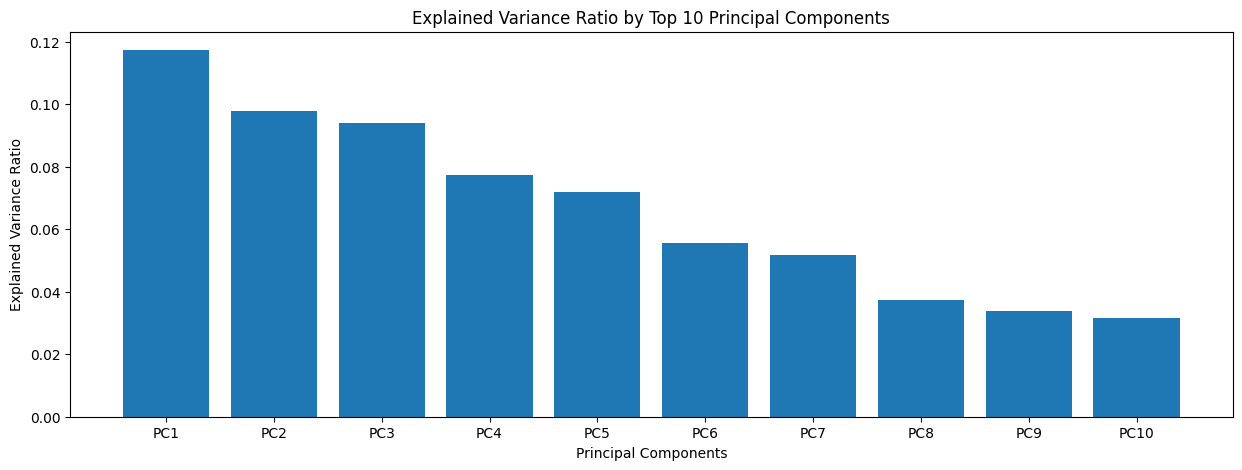

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Separate 'shares' column from df2 and impute missing values in features
y = df2[' shares']  # Target column
X = df2.drop(' shares', axis=1)  # Features only

# Impute missing values in features using the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 3: Fit PCA on the standardized data to retain only the top 10 principal components
pca = PCA(n_components=10, random_state=22)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Get the loadings and explained variance ratio for the top 10 components
loadings = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Step 5: Create labels for the top 10 principal components (PC1, PC2, ..., PC10)
pc_list = ["PC" + str(i) for i in range(1, 11)]

# Step 6: Plot the explained variance ratio for each of the top 10 principal components
plt.figure(figsize=(15, 5))
plt.bar(x=pc_list, height=explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Top 10 Principal Components')
plt.show()

# Step 7: Create a DataFrame using the top 10 principal components and add the target 'shares'
df_pca = pd.DataFrame(X_pca, columns=pc_list)
df_pca['shares'] = y


In [68]:
# Step 7: Create a DataFrame using the principal components and add the target 'shares'
df_pca = pd.DataFrame(X_pca, columns=pc_list)
df_pca[' shares'] = y.values  # Add the target column back

# Display the first few rows of the new DataFrame
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.933319  0.972759  2.180856  1.507714  3.695579 -6.833638  0.878588   
1 -4.638889  3.073137  2.109085  1.910829  0.391957 -6.615153  0.132454   
2 -0.741369  1.844915  4.176239  2.532429  0.203403 -6.391596 -0.527542   
3 -2.452590  4.526436  1.255904  2.189672  1.727782 -5.622902 -0.906274   
4  1.866386  3.344845  4.063944 -2.146608 -0.288773 -6.671470  3.152882   

        PC8       PC9      PC10    shares  
0 -1.995796 -2.002865 -0.653081  1.999705  
1 -1.091848 -1.030079 -0.514113  2.023939  
2 -3.044913 -1.824099  1.897102  2.117927  
3 -3.268393 -0.836632  1.135736  2.090741  
4 -2.584697 -1.070044  1.932319  1.977760  


In [69]:

# Define features (principal components) and the target (shares)
X = df_pca.drop(' shares', axis=1)  # Features are the principal components
y = df_pca[' shares']               # Target is the shares column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the training and testing sets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (27750, 10), (27750,)
Testing set: (11894, 10), (11894,)


## one hot encoding

In [ ]:
######from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

# Now proceed with SelectKBest
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X_imputed, y)
X_kbest = selector.transform(X_imputed)

selected_features = X_imputed.columns[selector.get_support()]
X_kbest_df1= pd.DataFrame(X_kbest, columns=selected_features)

# Fit a RandomForestRegressor to evaluate feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_kbest_df1, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df1 = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df1)

In [ ]:
####print(X_imputed.shape)
print(y.shape)


In [ ]:
####print(X_imputed.isnull().sum().sum())  # Should return 0
print(y.isnull().sum())  # Should return 0


In [ ]:
##print(X_imputed.dtypes)


In [70]:

X_test_unseen = X_test.copy()
X_test_unseen.to_csv('X_test_unseen.csv', index=False)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (27750, 10)
X_test shape: (11894, 10)
y_train shape: (27750,)
y_test shape: (11894,)


### scaling

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape y_train and y_test to 2D before scaling
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [72]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [74]:
print("\nLinear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_linear)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_linear))}")
print(f"R² Score: {r2_score(y_test, y_pred_linear)}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 0.07429770973777579
Mean Squared Error (MSE): 0.008810913478808373
Root Mean Squared Error (RMSE): 0.09386646621029457
R² Score: 0.09720684284371761


In [75]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

In [76]:
print("\nSupport Vector Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_svr)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_svr)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_svr))}")
print(f"R² Score: {r2_score(y_test, y_pred_svr)}")


Support Vector Regressor Model Evaluation:
Mean Absolute Error (MAE): 0.07614441659922985
Mean Squared Error (MSE): 0.00912928265939373
Root Mean Squared Error (RMSE): 0.09554727970692692
R² Score: 0.06458576236514901


In [77]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [78]:
print("\nRandom Forest Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")


Random Forest Regressor Model Evaluation:
Mean Absolute Error (MAE): 0.0736717673913369
Mean Squared Error (MSE): 0.008751785745876612
Root Mean Squared Error (RMSE): 0.0935509793956034
R² Score: 0.10326525129561592


In [79]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

In [80]:
print("\nGradient Boosting Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_gb)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_gb)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_gb))}")
print(f"R² Score: {r2_score(y_test, y_pred_gb)}")


Gradient Boosting Regressor Model Evaluation:
Mean Absolute Error (MAE): 0.07343134321028619
Mean Squared Error (MSE): 0.008656860967180002
Root Mean Squared Error (RMSE): 0.09304225366563303
R² Score: 0.11299153459847555


In [81]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

In [82]:
print("\nk-Nearest Neighbors Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_knn)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_knn)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_knn))}")
print(f"R² Score: {r2_score(y_test, y_pred_knn)}")


k-Nearest Neighbors Model Evaluation:
Mean Absolute Error (MAE): 0.07864203046589388
Mean Squared Error (MSE): 0.010063233365392046
Root Mean Squared Error (RMSE): 0.10031566859365514
R² Score: -0.031109684937165483


In [83]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(max_iter=1000)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

In [84]:
print("\nMulti-Layer Perceptron Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_mlp)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_mlp)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_mlp))}")
print(f"R² Score: {r2_score(y_test, y_pred_mlp)}")


Multi-Layer Perceptron Model Evaluation:
Mean Absolute Error (MAE): 0.07791809358326415
Mean Squared Error (MSE): 0.009764420760403958
Root Mean Squared Error (RMSE): 0.098815083668456
R² Score: -0.0004924310390175268


## 13. Hyperparameter Tuning
Hyperparameter tuning is the process of optimizing the parameters of a machine learning model to improve its performance. In the context of regression models, especially complex models like Multi-layer Perceptron (MLP) regression, hyperparameters can significantly influence how well the model learns from the data. Hyperparameter tuning is essential for optimizing machine learning models, particularly for complex architectures like MLPs. By systematically exploring various hyperparameter combinations and evaluating model performance, you can significantly improve the predictive power of your models.

### 1.Linear regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
ridge = Ridge()
param_dist_ridge = {
    'alpha': np.logspace(-3, 3, 7)  
}
random_search_ridge = RandomizedSearchCV(estimator=ridge, param_distributions=param_dist_ridge, 
                                         scoring='neg_mean_squared_error', cv=5, n_iter=10, verbose=1, random_state=42)
random_search_ridge.fit(X_train_scaled, y_train)
best_ridge = random_search_ridge.best_estimator_
print("Best Ridge Parameters:", random_search_ridge.best_params_)
y_pred_ridge = best_ridge.predict(X_test_scaled)

### 2.Multi-layer Perceptron (MLP)

In [ ]:
mlp = MLPRegressor(max_iter=2000, learning_rate_init=0.001, early_stopping=True, n_iter_no_change=10)
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': np.logspace(-5, 0, 3)  
}
random_search_mlp = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist_mlp, 
                                       scoring='neg_mean_squared_error', cv=3, n_iter=5, verbose=1, random_state=42, n_jobs=-1)
random_search_mlp.fit(X_train_scaled, y_train)

best_mlp = random_search_mlp.best_estimator_
print("Best MLP Parameters:", random_search_mlp.best_params_)
y_pred_mlp = best_mlp.predict(X_test_scaled)

## model evakuation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"R² Score: {r2_ridge}")

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("Multi-Layer Perceptron Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_mlp}")
print(f"Mean Squared Error (MSE): {mse_mlp}")
print(f"Root Mean Squared Error (RMSE): {rmse_mlp}")
print(f"R² Score: {r2_mlp}")

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

# Example of hyperparameter grids
param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'SVR': {
        'kernel': ['linear', 'poly', 'rbf'],
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.1, 0.2, 0.5]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'MLP': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
}


In [ ]:
best_params = {}
best_scores = {}

for model_name, params in param_grid.items():
    if model_name == 'RandomForest':
        model = RandomForestRegressor(random_state=42)
    elif model_name == 'SVR':
        model = SVR()
    elif model_name == 'KNN':
        model = KNeighborsRegressor()
    elif model_name == 'MLP':
        model = MLPRegressor(random_state=42)
    elif model_name == 'DecisionTree':
        model = DecisionTreeRegressor(random_state=42)
    
    # Use GridSearchCV for each model
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Save the best parameters and score for each model
    best_params[model_name] = grid_search.best_params_
    best_scores[model_name] = -grid_search.best_score_

print("Best Parameters for each model:", best_params)
print("Best cross-validation scores (MSE) for each model:", best_scores)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
# define the evaluation function
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    
    return mae, mse, rmse, r2

In [ ]:
# Evaluate each model

In [ ]:
# Assuming you've already split the data into X_train, X_test, y_train, y_test

# RandomForest
print("Random Forest Evaluation:")
evaluate_model(grid_search_rf.best_estimator_, X_test, y_test)

# SVR
print("\nSVR Evaluation:")
evaluate_model(grid_search_svr.best_estimator_, X_test, y_test)

# KNN
print("\nK-Nearest Neighbors Evaluation:")
evaluate_model(grid_search_knn.best_estimator_, X_test, y_test)

# MLP
print("\nMulti-layer Perceptron Evaluation:")
evaluate_model(grid_search_mlp.best_estimator_, X_test, y_test)

# DecisionTree
print("\nDecision Tree Evaluation:")
evaluate_model(grid_search_dt.best_estimator_, X_test, y_test)

In [ ]:
# Store Results for Comparison

In [ ]:
results = {}

# Evaluate each model
results['RandomForest'] = evaluate_model(grid_search_rf.best_estimator_, X_test, y_test)
results['SVR'] = evaluate_model(grid_search_svr.best_estimator_, X_test, y_test)
results['KNN'] = evaluate_model(grid_search_knn.best_estimator_, X_test, y_test)
results['MLP'] = evaluate_model(grid_search_mlp.best_estimator_, X_test, y_test)
results['DecisionTree'] = evaluate_model(grid_search_dt.best_estimator_, X_test, y_test)

# Convert results to DataFrame for better visualization
import pandas as pd
metrics_df = pd.DataFrame(results, index=['MAE', 'MSE', 'RMSE', 'R²'])
print(metrics_df)
